<a href="https://colab.research.google.com/github/mushrifa-hussain/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mushrifahussain","key":"8201deff3c2a1e4cba4d84d776ea054a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 40.9MB/s]


In [7]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [11]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [12]:
df[numeric_cols].isnull().sum()

,0
id,0
age,0
trestbps,0
chol,0
thalch,0
oldpeak,0
ca,0
num,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

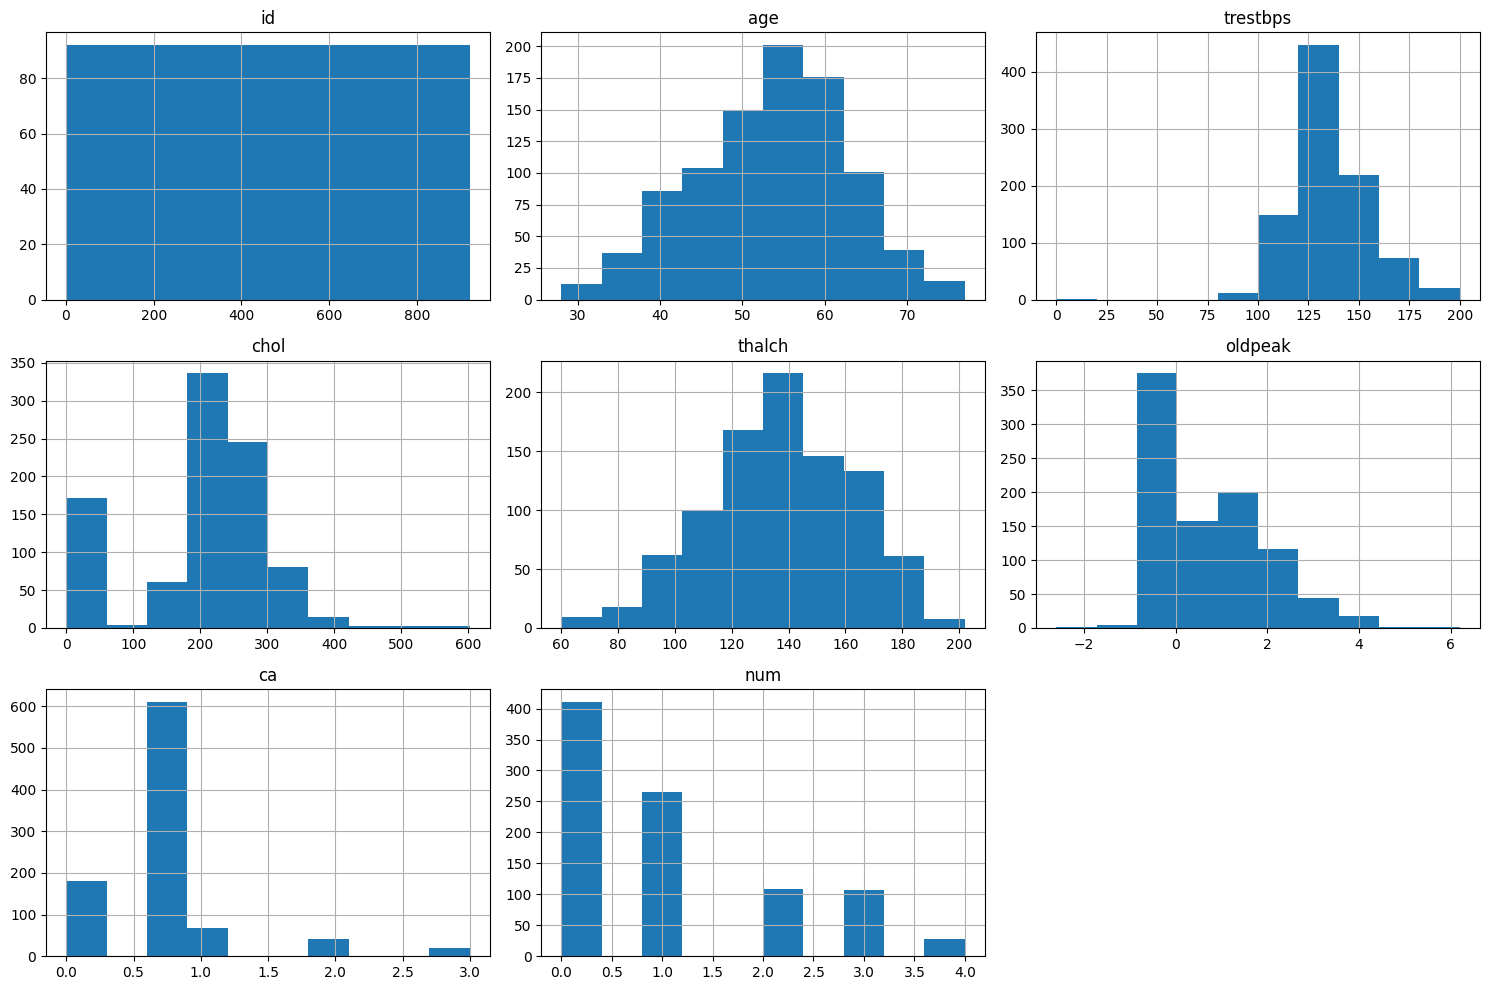

In [14]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

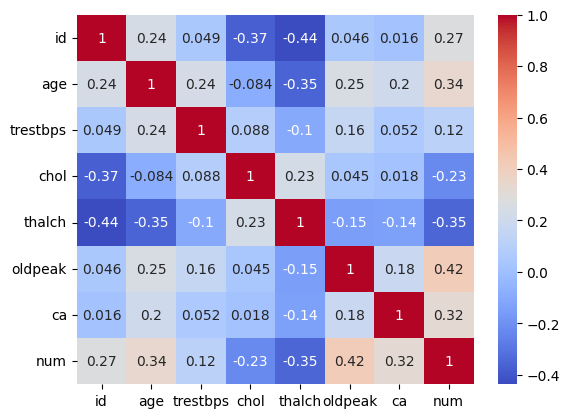

In [15]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [16]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [17]:
if 'num' in cat_cols:
  cat_cols.remove('num')

In [19]:
df[cat_cols].isnull().sum()

,0
sex,0
dataset,0
cp,0
fbs,90
restecg,2
exang,55
slope,309
thal,486


In [20]:
X = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int) #0 = no heart disease, 1 = has heart disease

In [21]:
# one-hot encoding
X = pd.get_dummies(X, columns = cat_cols)
print("Final feature columns:", X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [22]:
X

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,145.000000,233.0,150.000000,2.300000,0.000000,False,True,True,...,False,False,True,False,True,False,False,True,False,False
1,2,67,160.000000,286.0,108.000000,1.500000,3.000000,False,True,True,...,False,False,False,True,False,True,False,False,True,False
2,3,67,120.000000,229.0,129.000000,2.600000,2.000000,False,True,True,...,False,False,False,True,False,True,False,False,False,True
3,4,37,130.000000,250.0,187.000000,3.500000,0.000000,False,True,True,...,True,False,True,False,True,False,False,False,True,False
4,5,41,130.000000,204.0,172.000000,1.400000,0.000000,True,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,127.000000,333.0,154.000000,0.000000,0.676375,True,False,False,...,False,True,True,False,False,False,False,False,False,False
916,917,62,132.132404,139.0,137.545665,0.878788,0.676375,False,True,False,...,False,True,False,False,False,False,False,False,False,False
917,918,55,122.000000,223.0,100.000000,0.000000,0.676375,False,True,False,...,False,True,True,False,False,False,False,True,False,False
918,919,58,132.132404,385.0,137.545665,0.878788,0.676375,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#new val = (x - mean)/ sd

In [27]:
from sklearn.linear_model import LogisticRegression #classification

In [28]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [31]:
from sklearn.metrics import confusion_matrix

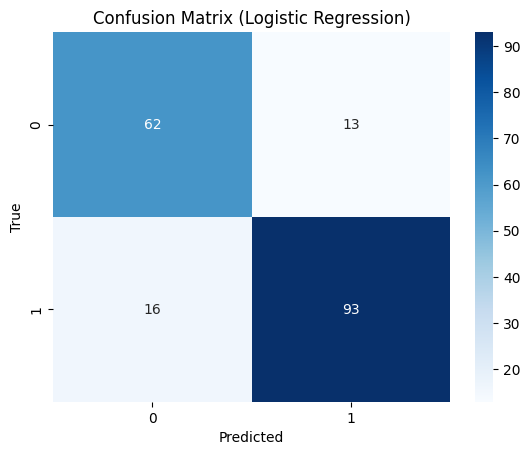

In [32]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
#ensemble of many decision tress

In [34]:
rf_model = RandomForestClassifier(n_estimators= 100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [35]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8858695652173914


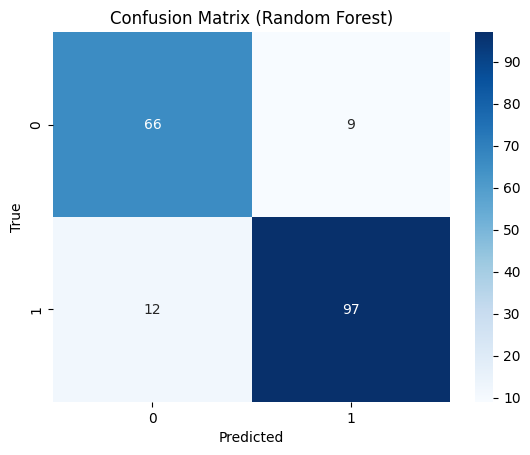

In [36]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

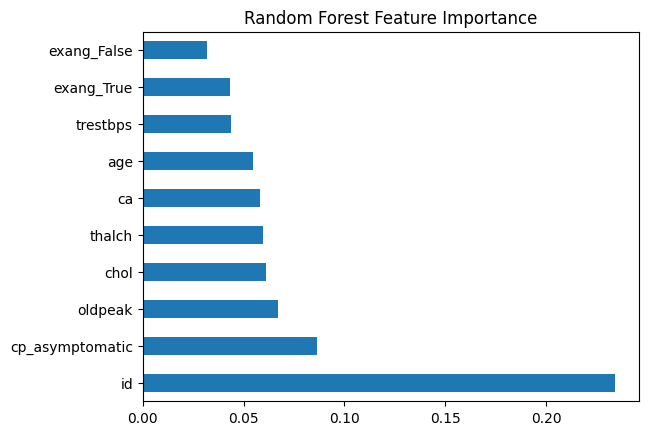

In [37]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

In [38]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')

['heart_rf_model.pkl']

In [39]:
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

# **User upload and prediction**

In [40]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset.csv


{'heart_dataset.csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\r\n58,130,220,1,normal,150,FALSE,1.4,flat,0,fixed defect,0,1,0,0,0,1\r\n67,160,276,0,lv hypertrophy,108,TRUE,1.5,flat,3,normal,0,1,1,0,0,0\r\n42,120,230,0,normal,170,FALSE,1,upsloping,0,reversable defect,1,0,0,0,1,0\r\n50,130,210,0,lv hypertrophy,158,FALSE,0.8,flat,0,normal,0,1,0,0,1,0\r\n45,114,230,0,normal,165,FALSE,1.1,downsloping,0,normal,1,0,0,1,0,0\r\n'}

In [44]:
import joblib
import pandas as pd

user_df = pd.read_csv('heart_dataset.csv')
user_df

,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1
1,67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0
2,42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0
3,50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0
4,45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0


In [45]:
#getting columns list from training dataframe
numeric_cols = df.select_dtypes(include=['number']).columns.to_list()
cat_cols = df.select_dtypes(include='object').columns.to_list()
bool_cols = df.select_dtypes(include='bool').columns.to_list()
print(numeric_cols)
print(cat_cols)
print(bool_cols)

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
[]


In [46]:
#dropping columns which are extra in user-df than required to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

#fill the missing numeric column, bool column & cat column
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col] = user_df[col].fillna('Unknown')
for col in bool_cols:
  user_df[col] = user_df[col].astype(int)

#one-hot encoding cat columns
user_df_encoded = pd.get_dummies(user_df, columns = cat_cols)

#align columns
user_df_encoded = user_df_encoded.reindex(columns = X.columns, fill_value = 0)

#scale data
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

#load model
model = joblib.load('heart_rf_model.pkl')
prediction = model.predict(user_df_scaled)
user_df['Heart_Disease_Prediction'] = prediction

In [47]:
#show result
print(user_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

In [49]:
from google.colab import files
files.download('heart_rf_model.pkl')
files.download('heart_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
joblib.dump(X.columns, "X_columns.pkl")
files.download('X_columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>